# 1D Poisson Problem: Setting the Foundation

## Introduction

The journey toward understanding multilayer perceptrons begins with a concrete scientific problem that motivates the need for sophisticated function approximation techniques. The 1D Poisson equation serves as our entry point—a deceptively simple yet profound example that reveals both the power and limitations of traditional approaches while setting the stage for neural network solutions.

Consider the fundamental question: *How do we approximate unknown functions when analytical solutions are intractable?* This question lies at the heart of scientific computing, and the 1D Poisson equation provides the perfect laboratory to explore this challenge.

## The 1D Poisson Equation

We examine the one-dimensional Poisson equation on the unit interval $[0, 1]$ with homogeneous Dirichlet boundary conditions:

$$-\frac{d^2u}{dx^2} = f(x), \quad x \in [0, 1]$$

subject to boundary conditions:
$$u(0) = 0, \quad u(1) = 0$$

This equation models diverse physical phenomena: heat conduction in a rod, deflection of a loaded beam, or electrostatic potential in one dimension. The function $u(x)$ represents the unknown solution we seek, while $f(x)$ is the prescribed source term.

For our initial exploration, we choose:
$$f(x) = \pi^2 \sin(\pi x)$$

This choice is deliberate—it yields the analytical solution:
$$u(x) = \sin(\pi x)$$

We can verify this solution by direct substitution. The second derivative of $u(x) = \sin(\pi x)$ is $u''(x) = -\pi^2 \sin(\pi x)$, so:
$$-\frac{d^2u}{dx^2} = -(-\pi^2 \sin(\pi x)) = \pi^2 \sin(\pi x) = f(x) \quad \checkmark$$

The boundary conditions are satisfied: $u(0) = \sin(0) = 0$ and $u(1) = \sin(\pi) = 0$ ✓

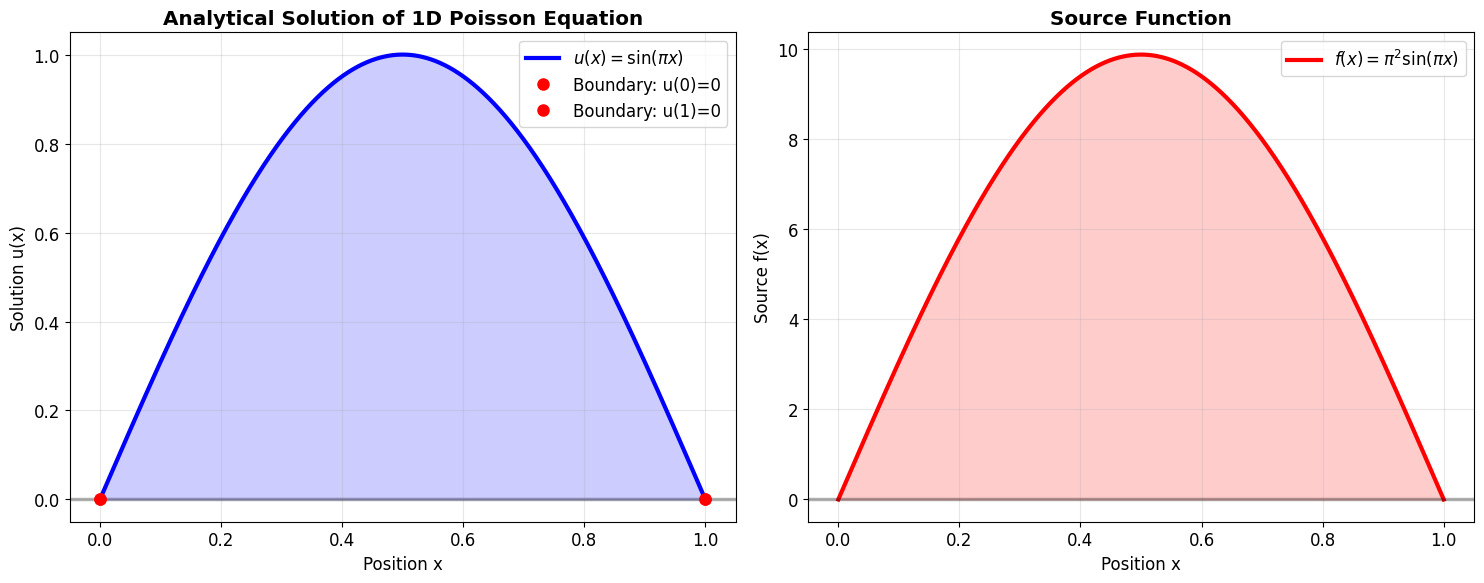

Maximum value of solution: 1.0000
Maximum value of source: 9.8696
Solution satisfies boundary conditions: u(0) = 0.000000, u(1) = 0.000000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Set up plotting style for clarity
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (12, 8),
    'lines.linewidth': 2.5,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Define the domain
x = np.linspace(0, 1, 1000)

# Define the analytical solution and source function
def analytical_solution(x):
    """Analytical solution: u(x) = sin(π*x)"""
    return np.sin(np.pi * x)

def source_function(x):
    """Source function: f(x) = π²*sin(π*x)"""
    return np.pi**2 * np.sin(np.pi * x)

# Compute solutions
u_analytical = analytical_solution(x)
f_source = source_function(x)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the analytical solution
ax1.plot(x, u_analytical, 'b-', linewidth=3, label=r'$u(x) = \sin(\pi x)$')
ax1.fill_between(x, 0, u_analytical, alpha=0.2, color='blue')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.plot([0, 0], [0, 0], 'ro', markersize=8, label='Boundary: u(0)=0')
ax1.plot([1, 1], [0, 0], 'ro', markersize=8, label='Boundary: u(1)=0')
ax1.set_xlabel('Position x')
ax1.set_ylabel('Solution u(x)')
ax1.set_title('Analytical Solution of 1D Poisson Equation', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot the source function
ax2.plot(x, f_source, 'r-', linewidth=3, label=r'$f(x) = \pi^2 \sin(\pi x)$')
ax2.fill_between(x, 0, f_source, alpha=0.2, color='red')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_xlabel('Position x')
ax2.set_ylabel('Source f(x)')
ax2.set_title('Source Function', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Maximum value of solution: {np.max(u_analytical):.4f}")
print(f"Maximum value of source: {np.max(f_source):.4f}")
print(f"Solution satisfies boundary conditions: u(0) = {analytical_solution(0):.6f}, u(1) = {analytical_solution(1):.6f}")

## Why This Problem Matters for Neural Networks

The 1D Poisson equation, despite its apparent simplicity, embodies the core challenge of function approximation that neural networks are designed to address:

1. **Unknown Function Recovery**: Given only the differential equation and boundary conditions, we must recover the unknown function $u(x)$.

2. **Continuous Domain**: Unlike discrete data points, we need to approximate a function over a continuous domain.

3. **Physical Constraints**: The solution must satisfy both the differential equation and boundary conditions.

4. **Smooth Approximation**: The solution should be sufficiently smooth to be physically meaningful.

Traditional numerical methods like finite differences or finite elements discretize the problem, trading continuous approximation for discrete accuracy. Neural networks offer a fundamentally different approach: they can represent continuous functions directly while learning to satisfy the governing equations.

## The Function Approximation Challenge

Consider this question: *Can a neural network learn to approximate $u(x) = \sin(\pi x)$ by observing only sparse data points?*

Let's explore this with a concrete example.

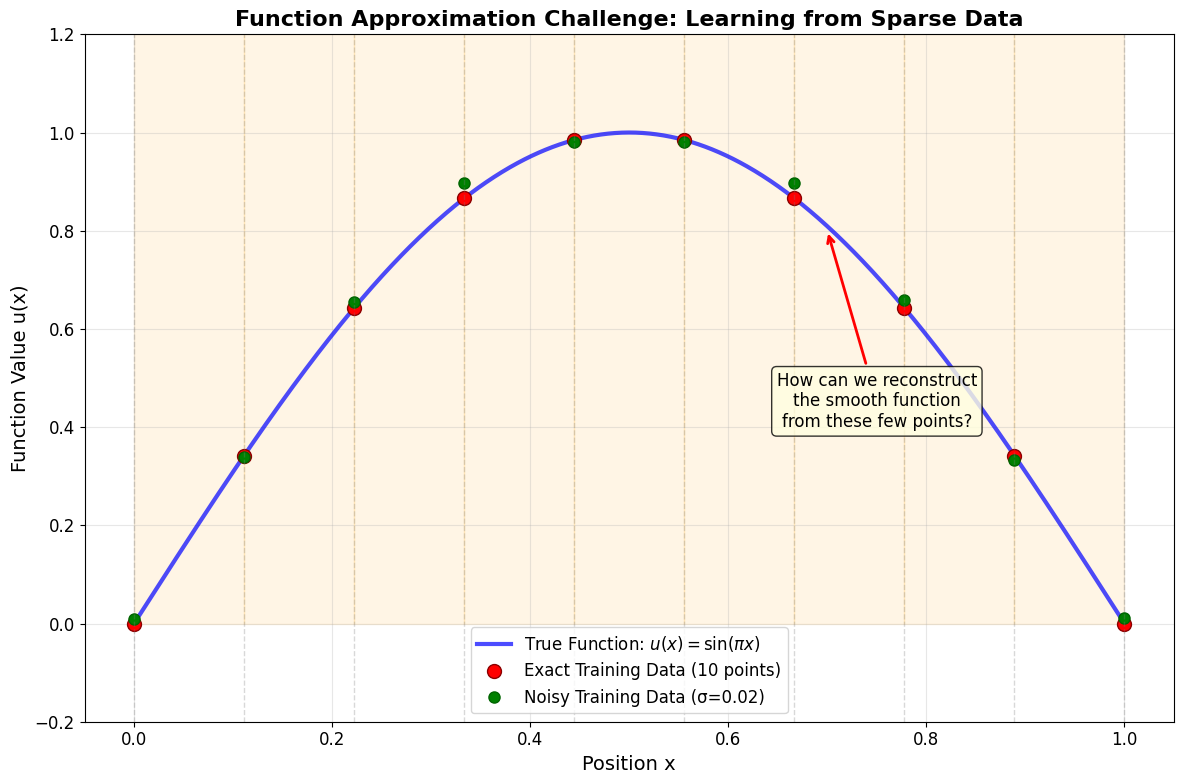

Challenge: Approximate a continuous function using only 10 data points
Training points spacing: 0.111
We need to learn the pattern and interpolate smoothly between points


In [2]:
# Generate sparse training data
np.random.seed(42)  # For reproducibility

n_training_points = 10
x_train = np.linspace(0, 1, n_training_points)
u_train = analytical_solution(x_train)

# Add small amount of noise to make it more realistic
noise_level = 0.02
u_train_noisy = u_train + noise_level * np.random.randn(n_training_points)

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the true function
x_fine = np.linspace(0, 1, 1000)
u_true = analytical_solution(x_fine)
ax.plot(x_fine, u_true, 'b-', linewidth=3, label='True Function: $u(x) = \sin(\pi x)$', alpha=0.7)

# Plot training data
ax.plot(x_train, u_train, 'ro', markersize=10, label=f'Exact Training Data ({n_training_points} points)', markeredgecolor='darkred')
ax.plot(x_train, u_train_noisy, 'go', markersize=8, label=f'Noisy Training Data (σ={noise_level})', markeredgecolor='darkgreen')

# Add some visual elements to emphasize the challenge
for i, (xi, ui) in enumerate(zip(x_train, u_train_noisy)):
    ax.axvline(x=xi, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    if i < len(x_train) - 1:
        ax.fill_betweenx([0, 1.2], xi, x_train[i+1], alpha=0.1, color='orange')

ax.set_xlabel('Position x', fontsize=14)
ax.set_ylabel('Function Value u(x)', fontsize=14)
ax.set_title('Function Approximation Challenge: Learning from Sparse Data', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.2, 1.2)

# Add annotation
ax.annotate('How can we reconstruct\nthe smooth function\nfrom these few points?', 
            xy=(0.7, 0.8), xytext=(0.75, 0.4),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Challenge: Approximate a continuous function using only {n_training_points} data points")
print(f"Training points spacing: {x_train[1] - x_train[0]:.3f}")
print(f"We need to learn the pattern and interpolate smoothly between points")

## Traditional vs Neural Network Approaches

Traditional numerical methods for solving the 1D Poisson equation include:

### Finite Difference Method
Discretize the derivative using finite differences:
$$\frac{d^2u}{dx^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}$$

This transforms the differential equation into a system of linear equations.

### Finite Element Method
Approximate the solution using basis functions (typically piecewise polynomials) and minimize the residual in a weak sense.

### Neural Network Approach
Represent the solution as:
$$u_{NN}(x; \theta) = \text{Neural Network}(x; \theta)$$

where $\theta$ represents the network parameters (weights and biases).

Let's compare these approaches conceptually:

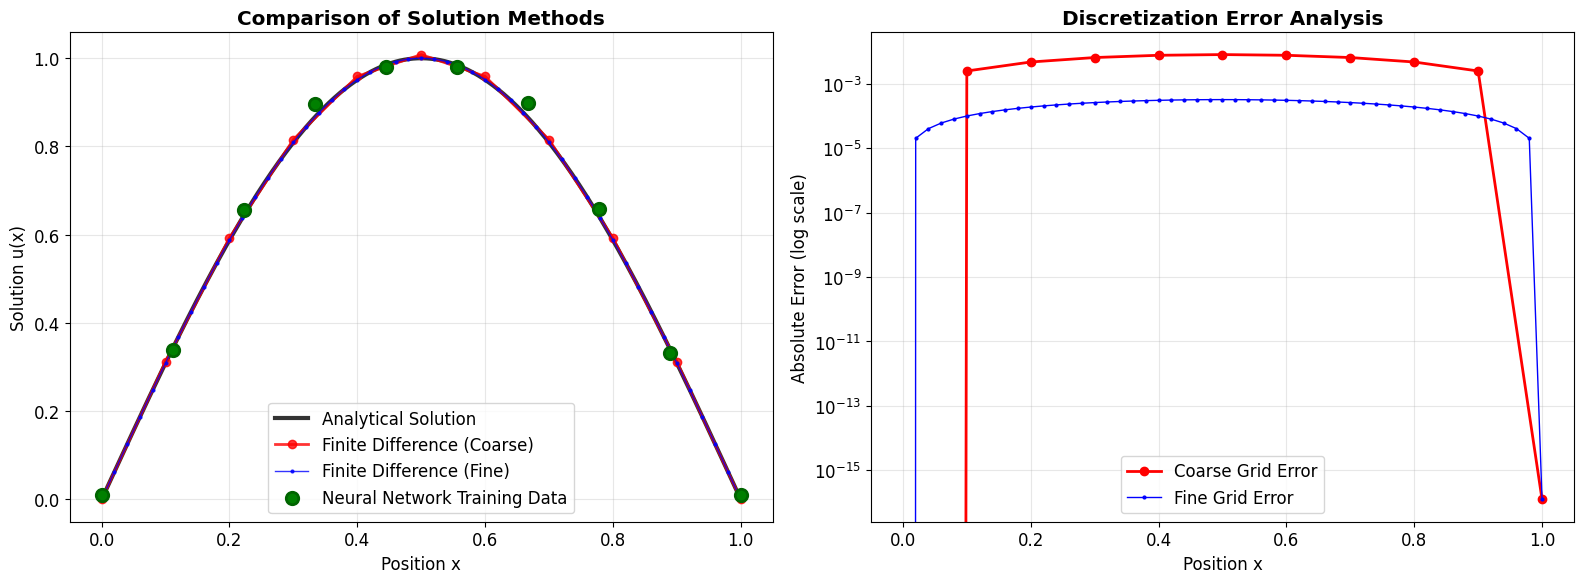

Finite Difference Error Statistics:
Coarse grid (11 points): Max error = 0.008265
Fine grid (51 points):   Max error = 0.000329
Error reduction factor: 25.12


In [3]:
# Simple finite difference solution for comparison
def solve_poisson_fd(n_points=51):
    """Solve 1D Poisson equation using finite differences"""
    # Create grid
    x_fd = np.linspace(0, 1, n_points)
    h = x_fd[1] - x_fd[0]
    
    # Create coefficient matrix A for -u'' = f
    # Central difference: u''_i ≈ (u_{i+1} - 2u_i + u_{i-1})/h²
    A = np.zeros((n_points-2, n_points-2))
    for i in range(n_points-2):
        A[i, i] = -2.0 / h**2
        if i > 0:
            A[i, i-1] = 1.0 / h**2
        if i < n_points-3:
            A[i, i+1] = 1.0 / h**2
    
    # Right-hand side (source function at interior points)
    f_rhs = source_function(x_fd[1:-1])
    
    # Solve linear system
    u_interior = np.linalg.solve(-A, f_rhs)  # Note: -A because we have -u'' = f
    
    # Assemble full solution (including boundary conditions)
    u_fd = np.zeros(n_points)
    u_fd[1:-1] = u_interior
    u_fd[0] = 0  # u(0) = 0
    u_fd[-1] = 0  # u(1) = 0
    
    return x_fd, u_fd

# Solve using finite differences with different resolutions
x_fd_coarse, u_fd_coarse = solve_poisson_fd(11)  # Coarse grid
x_fd_fine, u_fd_fine = solve_poisson_fd(51)      # Fine grid

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Method comparison
x_exact = np.linspace(0, 1, 1000)
u_exact = analytical_solution(x_exact)

ax1.plot(x_exact, u_exact, 'k-', linewidth=3, label='Analytical Solution', alpha=0.8)
ax1.plot(x_fd_coarse, u_fd_coarse, 'ro-', linewidth=2, markersize=6, label='Finite Difference (Coarse)', alpha=0.8)
ax1.plot(x_fd_fine, u_fd_fine, 'b.-', linewidth=1, markersize=4, label='Finite Difference (Fine)', alpha=0.8)
ax1.scatter(x_train, u_train_noisy, color='green', s=80, label='Neural Network Training Data', 
           edgecolors='darkgreen', linewidth=2, zorder=5)

ax1.set_xlabel('Position x')
ax1.set_ylabel('Solution u(x)')
ax1.set_title('Comparison of Solution Methods', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Error analysis
error_coarse = np.abs(u_fd_coarse - analytical_solution(x_fd_coarse))
error_fine = np.abs(u_fd_fine - analytical_solution(x_fd_fine))

ax2.semilogy(x_fd_coarse, error_coarse, 'ro-', linewidth=2, markersize=6, label='Coarse Grid Error')
ax2.semilogy(x_fd_fine, error_fine, 'b.-', linewidth=1, markersize=4, label='Fine Grid Error')
ax2.set_xlabel('Position x')
ax2.set_ylabel('Absolute Error (log scale)')
ax2.set_title('Discretization Error Analysis', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print error statistics
print(f"Finite Difference Error Statistics:")
print(f"Coarse grid (11 points): Max error = {np.max(error_coarse):.6f}")
print(f"Fine grid (51 points):   Max error = {np.max(error_fine):.6f}")
print(f"Error reduction factor: {np.max(error_coarse)/np.max(error_fine):.2f}")

## Key Insights and Motivation for Neural Networks

This exploration of the 1D Poisson equation reveals several crucial insights that motivate the neural network approach:

### 1. **Continuous Representation**
Traditional methods discretize the domain, leading to discrete approximations. Neural networks can represent continuous functions directly, potentially offering superior interpolation properties.

### 2. **Mesh-Free Approach**
Finite difference and finite element methods require carefully constructed meshes. Neural networks are inherently mesh-free—they can evaluate the solution at any point in the domain.

### 3. **High-Dimensional Scalability**
While our 1D example is simple, traditional methods suffer from the "curse of dimensionality" in higher dimensions. Neural networks can potentially scale more favorably.

### 4. **Automatic Differentiation**
Neural network frameworks provide automatic differentiation, making it straightforward to compute derivatives needed for physics-informed training.

### 5. **Flexibility in Problem Formulation**
Neural networks can incorporate complex boundary conditions, irregular domains, and nonlinear physics more naturally than traditional methods.

## The Path Forward

The 1D Poisson equation serves as our foundation, but it also raises fundamental questions:

- **How many neurons do we need** to approximate a given function to desired accuracy?
- **What role do activation functions play** in enabling complex function approximation?
- **Can a single layer suffice**, or do we need multiple layers?
- **What theoretical guarantees** exist for neural network approximation?

These questions lead us naturally to the concepts of universal approximation, the role of nonlinearity, and the trade-offs between network width and depth—topics we will explore in subsequent notebooks.

The journey from this simple 1D problem to deep multilayer perceptrons capable of solving complex scientific problems begins with understanding these fundamental principles. In the next notebook, we will take our first steps toward building neural network approximations of the functions we've introduced here.

## Summary and Preview

In this notebook, we established:

1. **The Scientific Context**: The 1D Poisson equation as a concrete function approximation challenge
2. **The Mathematical Framework**: Precise problem statement with known analytical solution
3. **The Approximation Challenge**: How to recover continuous functions from discrete data
4. **Traditional Methods**: Finite difference approaches and their limitations
5. **Neural Network Motivation**: Why neural networks offer a promising alternative

**Next Steps**: In the following notebooks, we will:
- Build our first neural network function approximator
- Explore the role of network width and activation functions
- Understand the theoretical foundations of universal approximation
- Discover the limitations of single-layer networks
- Reveal the power of depth in multilayer perceptrons

The 1D Poisson equation will remain our computational laboratory, providing concrete examples and benchmarks as we develop increasingly sophisticated neural network architectures.